In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SBPD_Recruitment_Data.csv')

In [3]:
df.head()

,Applicant_ID,Applicant_City,Applicant_State__Region,Applicant_Zip_Postal_Code,Position_Title,Req_Number,Location,Division,Applicant_Status,Last_Hiring_Stage,Source,Applicant_Apply_Method,Entry_Date,Ethnicity,Gender,EEO_Veteran_Status__Pre_Offer_,Cycle,ObjectId
0,63217447,Mill Creek,IN,46365,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Word of Mouth,Mobile,2018-10-29T23:43:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,1
1,51041583,Walkerton,IN,46574,Police Officer Recruit,PUB-17-00002,South Bend Police Department,Police,Hired,"Passed Polygraph, Medical, Psych, and Hired",Job/Career Fair,Web,2017-05-08T15:05:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Fall 2017,2
2,63244731,Bedford,IN,47421,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Other,Web,2018-10-31T06:36:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,3
3,63326694,Mishawaka,IN,46544,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Company Website,Web,2018-11-05T13:28:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,4
4,50555166,Niles,MI,49120,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Internet/Job Board,Mobile,2018-11-06T14:00:00.000Z,Black or African American (Not Hispanic or Lat...,Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,5


In [4]:
# how is ethnicity distributed by applicant?
df['Ethnicity'].value_counts()

White (Not Hispanic or Latino)                                        955
Black or African American (Not Hispanic or Latino)                    280
Hispanic or Latino                                                    128
Two or More Races (Not Hispanic or Latino)                             62
Prefer not to answer                                                   23
Asian (Not Hispanic or Latino)                                         20
American Indian or Alaska Native (Not Hispanic or Latino)               7
Native Hawaiian or Other Pacific Islander (Not Hispanic or Latino)      2
Unknown                                                                 1
Name: Ethnicity, dtype: int64

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15,5))

ax1.pie(df['Applicant_Apply_Method'].value_counts().values, 
        labels=df['Applicant_Apply_Method'].value_counts().index, 
        startangle=90, textprops={'fontsize': 15}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/applicant apply method.png")

In [125]:
# a large quantity of applications(25%) don't state the ethnicity of the applicant
np.sum(df['Ethnicity'].isna()) / df['Ethnicity'].count()

0.25372124492557513

In [4]:
# what percent of the applicants are non-white? this includes people who don't state ethnicity
(np.sum(df['Ethnicity'] != 'White (Not Hispanic or Latino)') / df['Ethnicity'].count())

0.6075778078484438

In [5]:
# what percent of applicants are black?
(np.sum(df['Ethnicity'] == 'Black or African American (Not Hispanic or Latino)') / df['Ethnicity'].count())

0.18944519621109607

In [9]:
# how are applicant statuses distributed?
df['Applicant_Status'].value_counts()

AP - Incomplete                          1022
HM - No Show Fitness (Police)             485
HM - Reviewed Disqualified (Police)        62
HR - Withdrew                              51
HM - Written Exam Fail (Police)            26
HM - Fitness Test Info Sent (Police)       26
HM - Fitness Test Fail (Police)            24
Hired                                      24
HM - Personal Interview Fail (Police)      23
HM - Oral Board Fail (Police)              21
AP - Qualified (emailed)                   17
HM - Background Fail (Police)              15
OF - Withdrawn                             13
AP - Not Qualified                         12
HM - No Show Written (Police)              11
HM - Polygraph Fail (Police)               11
HR - Unable to contact                      3
INTV - Withdrew                             3
HM - Personal Interview Pass (Police)       2
HM - Written Exam Pass (Police)             1
VF - Disqualified                           1
Name: Applicant_Status, dtype: int

In [47]:
# how does applicant status differ from last hiring status?
# last_hiring_stage = 

df['Last_Hiring_Stage'].value_counts()

Disqualified/Withdrew/Incomplete               1090
Submitted Application                           605
Completed Written Test                           26
Took Physical Test                               24
Passed Polygraph, Medical, Psych, and Hired      24
Completed Personal                               23
Completed Interview                              21
Passed Interview                                 15
Passed Physical Test                             11
Passed Background                                11
Passed Personal                                   2
Passed Written Test                               1
Name: Last_Hiring_Stage, dtype: int64

In [44]:
last_hiring_stage.index = last_hiring_stage.iloc[2:20].sum()

158

In [45]:
last_hiring_stage.iloc[0]

1090

In [46]:
last_hiring_stage.iloc[1]

605

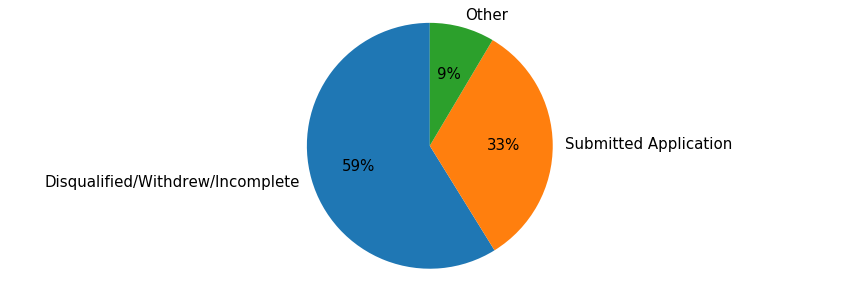

In [54]:
fig1, ax1 = plt.subplots(figsize=(15,5))

amounts = [last_hiring_stage.iloc[0], last_hiring_stage.iloc[1], last_hiring_stage.iloc[2:20].sum()]
labels = ['Disqualified/Withdrew/Incomplete', 'Submitted Application', 'Other' ]

ax1.pie(amounts, labels=labels, 
        startangle=90, textprops={'fontsize': 15}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/last hiring stage.png")

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [12]:
# for applicants that have been hired, what are their ethnicities?
df[df['Applicant_Status'] == 'Hired']['Ethnicity'].value_counts()

White (Not Hispanic or Latino)                        20
Black or African American (Not Hispanic or Latino)     2
Hispanic or Latino                                     1
Name: Ethnicity, dtype: int64

In [13]:
# how many hiring cycles has their been?
df['Cycle'].value_counts()

Summer 2018    441
Spring 2018    379
Fall 2017      348
Spring 2019    310
Summer 2019    253
Summer 2017    122
Name: Cycle, dtype: int64

In [8]:
# for applicants who aren't white, what is their last hiring stage?
df[df['Ethnicity'] != 'White (Not Hispanic or Latino)']['Last_Hiring_Stage'].value_counts()

Disqualified/Withdrew/Incomplete               608
Submitted Application                          228
Completed Written Test                          17
Took Physical Test                              12
Completed Personal                              10
Passed Interview                                 8
Passed Background                                5
Passed Polygraph, Medical, Psych, and Hired      4
Completed Interview                              3
Passed Physical Test                             3
Name: Last_Hiring_Stage, dtype: int64

In [9]:
df[df['Ethnicity'] == 'White (Not Hispanic or Latino)']['Last_Hiring_Stage'].value_counts()

Disqualified/Withdrew/Incomplete               482
Submitted Application                          377
Passed Polygraph, Medical, Psych, and Hired     20
Completed Interview                             18
Completed Personal                              13
Took Physical Test                              12
Completed Written Test                           9
Passed Physical Test                             8
Passed Interview                                 7
Passed Background                                6
Passed Personal                                  2
Passed Written Test                              1
Name: Last_Hiring_Stage, dtype: int64

In [14]:
df[df['Ethnicity'] == 'White (Not Hispanic or Latino)']['Applicant_Status'].value_counts()

AP - Incomplete                          436
HM - No Show Fitness (Police)            303
HR - Withdrew                             35
HM - Reviewed Disqualified (Police)       30
HM - Fitness Test Info Sent (Police)      20
Hired                                     20
HM - Oral Board Fail (Police)             18
HM - Personal Interview Fail (Police)     13
HM - Fitness Test Fail (Police)           12
AP - Qualified (emailed)                  11
AP - Not Qualified                        10
HM - Written Exam Fail (Police)            9
OF - Withdrawn                             8
HM - No Show Written (Police)              8
HM - Background Fail (Police)              7
HM - Polygraph Fail (Police)               6
HR - Unable to contact                     3
INTV - Withdrew                            3
HM - Personal Interview Pass (Police)      2
HM - Written Exam Pass (Police)            1
Name: Applicant_Status, dtype: int64

In [15]:
df[df['Ethnicity'] != 'White (Not Hispanic or Latino)']['Applicant_Status'].value_counts()

AP - Incomplete                          586
HM - No Show Fitness (Police)            182
HM - Reviewed Disqualified (Police)       32
HM - Written Exam Fail (Police)           17
HR - Withdrew                             16
HM - Fitness Test Fail (Police)           12
HM - Personal Interview Fail (Police)     10
HM - Background Fail (Police)              8
HM - Fitness Test Info Sent (Police)       6
AP - Qualified (emailed)                   6
OF - Withdrawn                             5
HM - Polygraph Fail (Police)               5
Hired                                      4
HM - Oral Board Fail (Police)              3
HM - No Show Written (Police)              3
AP - Not Qualified                         2
VF - Disqualified                          1
Name: Applicant_Status, dtype: int64

In [53]:
# assign hiring cycles into years

# the below doesn't work
# this article helped me figure it out https://www.dataquest.io/blog/settingwithcopywarning/
# df[df['Cycle'].str.contains('2017')].loc[:,'Year'] = 2017

# this worked
df.loc[df['Cycle'].str.contains('2017'), 'Year'] = 2017
df.loc[df['Cycle'].str.contains('2018'), 'Year'] = 2018
df.loc[df['Cycle'].str.contains('2019'), 'Year'] = 2019

In [59]:
# change year to int data type
df['Year'] = df['Year'].astype(int)

In [62]:
# how many applicants each year
df['Year'].value_counts()

2018    820
2019    563
2017    470
Name: Year, dtype: int64

### How is South Bend advertising police officer jobs?

In [10]:
# how is the means of getting the word out distributed by channels?
df['Source'].value_counts()

# based on these results it seems that South Bend has been proactive to advertise the job in a targeted way

Internet/Job Board        1158
Company Website            188
Other                      161
Word of Mouth              116
Employee Referral           85
Job/Career Fair             21
College/University          16
Radio/TV                    13
Agency                      10
Newspaper                    7
Community Organization       2
Name: Source, dtype: int64

In [11]:
# how are applicant methods distributed
df['Applicant_Apply_Method'].value_counts()

# based on these results South Bend has been proactive at making it easier to apply on a phone,
# which is going to appeal more to younger applicants

Mobile    954
Web       817
ATS        82
Name: Applicant_Apply_Method, dtype: int64

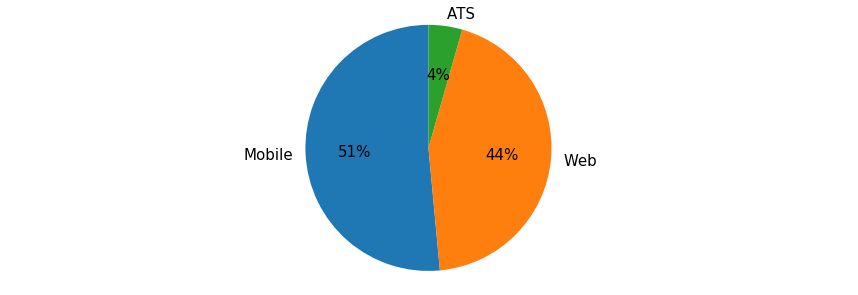

In [56]:
fig1, ax1 = plt.subplots(figsize=(15,5))

ax1.pie(df['Applicant_Apply_Method'].value_counts().values, 
        labels=df['Applicant_Apply_Method'].value_counts().index, 
        startangle=90, textprops={'fontsize': 15}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/applicant apply method.png")